In [1]:
import torch
from torchvision import datasets
from torchvision import transforms

# download the CIFAR dataset
data_path = '../datasets/'
cifar_10 = datasets.MNIST(data_path, train=True, download=True,
                          transform=transforms.ToTensor())
cifar_10_val = datasets.MNIST(data_path, train=False, download=True,
                              transform=transforms.ToTensor())

Label: 1


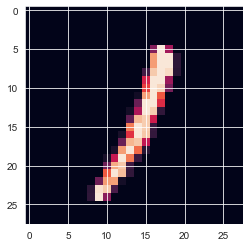

In [2]:
import matplotlib.pyplot as plt

# view a sample image
img, label = cifar_10[99]
print(f'Label: {label}')
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [3]:
import torch.utils.data as utils

train_loader = utils.DataLoader(cifar_10, batch_size=64, shuffle=True)
val_loader = utils.DataLoader(cifar_10, batch_size=64, shuffle=True)

In [4]:
# defines the training loop for our model
def training_loop(n_epochs, optimizer, model, loss_fn,
                  dataloader, dataloader_val):

    loss_train, loss_val = 0, 0

    for epoch in range(1, n_epochs + 1):

        for imgs, _ in dataloader:

            # forward pass
            batch_size = imgs.shape[0]
            output_train = model(imgs.view(batch_size, -1))
            loss_train = loss_fn(output_train, imgs.view(batch_size, -1))

            # backward pass
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

        # get the validation loss
        with torch.no_grad():
            for imgs, _ in dataloader_val:
                batch_size = imgs.shape[0]
                output_val = model(imgs.view(batch_size, -1))
                loss_val = loss_fn(output_val, imgs.view(batch_size, -1))

        print(f'Epoch {epoch}, Training loss {loss_train.item():.3f}, '
              f'Validation loss {loss_val.item():.3f}')

In [5]:
import torch.nn as nn
import torch.optim as optim

autoencoder = nn.Sequential(nn.Linear(784, 49),
                            nn.Sigmoid(),
                            nn.Linear(49, 784),
                            nn.Sigmoid()
)

# define the optimizer and its learning rate
learning_rate = 1e-3
adam_optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# define the loss function
mse_loss = nn.MSELoss()

# calls the training loop
training_loop(n_epochs=20,
              optimizer=adam_optimizer,
              model=autoencoder,
              loss_fn=mse_loss,
              dataloader=train_loader,
              dataloader_val=val_loader)

Epoch 1, Training loss 0.055, Validation loss 0.054
Epoch 2, Training loss 0.036, Validation loss 0.036
Epoch 3, Training loss 0.033, Validation loss 0.036
Epoch 4, Training loss 0.025, Validation loss 0.025
Epoch 5, Training loss 0.026, Validation loss 0.025
Epoch 6, Training loss 0.021, Validation loss 0.021
Epoch 7, Training loss 0.022, Validation loss 0.021
Epoch 8, Training loss 0.022, Validation loss 0.021
Epoch 9, Training loss 0.019, Validation loss 0.018
Epoch 10, Training loss 0.019, Validation loss 0.017
Epoch 11, Training loss 0.018, Validation loss 0.015
Epoch 12, Training loss 0.016, Validation loss 0.014
Epoch 13, Training loss 0.012, Validation loss 0.013
Epoch 14, Training loss 0.010, Validation loss 0.011
Epoch 15, Training loss 0.009, Validation loss 0.010
Epoch 16, Training loss 0.011, Validation loss 0.010
Epoch 17, Training loss 0.007, Validation loss 0.010
Epoch 18, Training loss 0.008, Validation loss 0.009
Epoch 19, Training loss 0.007, Validation loss 0.008
Ep

Label: 9
Original


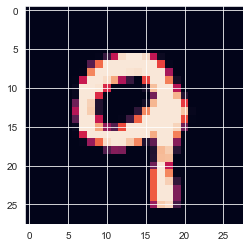

Reconstruction


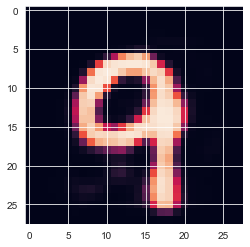

In [8]:
# view a sample image
img, label = cifar_10_val[99]
print(f'Label: {label}')
print('Original')
plt.imshow(img.permute(1, 2, 0))
plt.show()

# view reconstruction
out = autoencoder(img.view(-1).unsqueeze(0))
out = out.reshape(1, 28, 28)
print('Reconstruction')
plt.imshow(out.permute(1, 2, 0).detach().numpy())
plt.show()